
### Question: 2.	Visualise the energy density of food purchases across LSOAs in winter (October-April) and in summer (May-September).
#### a.	Is there a difference between energy density according to season?
####b.	What about the ratio of sugar to fibre?


**INTRODUCTION**

Importing the libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#1. Data description

Importing the CSV files from Jan to dec while concating the datasets of month May - sep as Summer and the rest as Winter

Uploading the CSV Files

In [55]:
# Read Monthly Datasets and store each month's data in a dictionary
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

dfs = {}

for month in months:
    df = pd.read_csv(f'/content/{month}_lsoa_grocery.csv')  # Load each month's data
    df.dropna(how='all', axis=1, inplace=True)               # Remove completely empty columns
    dfs[month] = df                                           # Store cleaned dataframe in dictionary

# Combine selected months into seasonal DataFrames
winter_months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
summer_months = ['May', 'Jun', 'Jul', 'Aug', 'Sep']

df_winter = pd.concat([dfs[month] for month in winter_months])  # Combine winter months
df_summer = pd.concat([dfs[month] for month in summer_months])  # Combine summer months

#2. Data Analysis

In [56]:
df_winter.head()

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E01000001,307.271023,35.0,150.0,250.0,400.0,900.0,251.416793,7.646865,97.835883,...,1394,1296.0,685.0,611.0,179.0,766.0,351.0,48.293981,0.13,9985.0
1,E01000002,307.081007,36.0,150.0,250.0,400.0,947.5,243.625824,9.665515,85.697304,...,627,1156.0,616.0,540.0,197.0,656.0,303.0,47.398789,0.23,5061.0
2,E01000003,309.543246,35.0,150.0,250.0,400.0,1000.0,244.341967,8.020125,104.987695,...,1258,1350.0,713.0,637.0,152.0,850.0,348.0,48.360741,0.06,22843.0
3,E01000005,359.387067,35.0,160.0,296.0,450.0,1000.0,526.084169,10.564711,121.970138,...,2153,1121.0,604.0,517.0,294.0,675.0,152.0,35.611954,0.19,5912.0
4,E01000006,499.025263,32.5,166.8,325.0,500.0,2000.0,868.792770,35.680224,125.403371,...,505,2040.0,1040.0,1000.0,563.0,1317.0,160.0,32.080392,0.15,13915.0


In [57]:
for c in df_winter.columns:
  print(c)

area_id
weight
weight_perc2.5
weight_perc25
weight_perc50
weight_perc75
weight_perc97.5
weight_std
weight_ci95
volume
volume_perc2.5
volume_perc25
volume_perc50
volume_perc75
volume_perc97.5
volume_std
volume_ci95
fat
fat_perc2.5
fat_perc25
fat_perc50
fat_perc75
fat_perc97.5
fat_std
fat_ci95
saturate
saturate_perc2.5
saturate_perc25
saturate_perc50
saturate_perc75
saturate_perc97.5
saturate_std
saturate_ci95
salt
salt_perc2.5
salt_perc25
salt_perc50
salt_perc75
salt_perc97.5
salt_std
salt_ci95
sugar
sugar_perc2.5
sugar_perc25
sugar_perc50
sugar_perc75
sugar_perc97.5
sugar_std
sugar_ci95
protein
protein_perc2.5
protein_perc25
protein_perc50
protein_perc75
protein_perc97.5
protein_std
protein_ci95
carb
carb_perc2.5
carb_perc25
carb_perc50
carb_perc75
carb_perc97.5
carb_std
carb_ci95
fibre
fibre_perc2.5
fibre_perc25
fibre_perc50
fibre_perc75
fibre_perc97.5
fibre_std
fibre_ci95
alcohol
alcohol_perc2.5
alcohol_perc25
alcohol_perc50
alcohol_perc75
alcohol_perc97.5
alcohol_std
alcohol_ci95
en

In [58]:
df_winter.describe()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
count,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,...,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000,30048.000000
mean,382.696738,35.618247,160.858891,291.601709,473.613068,1177.609592,442.424884,17.434016,112.527048,16.094010,...,1022.167499,1806.347344,898.528854,907.818490,405.386315,1199.845447,201.115582,35.949621,0.298797,10649.570121
std,52.581182,6.156202,23.663529,41.351692,45.844489,322.815361,155.139406,11.438134,18.490665,4.915164,...,947.148020,371.586770,202.884384,181.842763,134.468971,311.898457,80.039036,3.590309,0.548966,6696.158354
min,83.185669,2.000000,41.500000,50.000000,52.000000,425.000000,122.255388,2.792254,44.642105,2.500000,...,37.000000,802.000000,458.000000,309.000000,51.000000,591.000000,19.000000,25.015936,0.020000,125.000000
25%,347.171023,32.000000,150.000000,255.000000,450.000000,1000.000000,335.911214,9.719162,100.393041,11.125000,...,350.000000,1588.000000,775.000000,803.000000,317.000000,1008.000000,144.000000,33.507061,0.130000,5845.000000
50%,383.669706,35.425000,160.000000,300.000000,500.000000,1000.000000,409.984273,14.407105,110.595357,15.000000,...,736.000000,1743.000000,862.000000,882.000000,387.000000,1140.000000,189.000000,35.572436,0.190000,9402.000000
75%,417.073453,40.000000,180.000000,320.000000,500.000000,1500.000000,508.779682,21.920336,122.724288,18.707812,...,1364.000000,1954.000000,981.000000,984.000000,477.000000,1327.000000,247.000000,38.070707,0.300000,14235.000000
max,980.027778,100.000000,500.000000,1000.000000,1500.000000,10000.000000,2463.643323,277.135381,284.416679,113.600000,...,8161.000000,9551.000000,5138.000000,4413.000000,1789.000000,7548.000000,732.000000,55.253532,15.800000,91775.000000


In [59]:
df_summer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21247 entries, 0 to 4209
Columns: 202 entries, area_id to people_per_sq_km
dtypes: float64(199), int64(2), object(1)
memory usage: 32.9+ MB


#3. Data Processing Implementation Plan

In [60]:
# Add 'season' column to identify winter and summer data
df_winter['season'] = 'Winter'
df_summer['season'] = 'Summer'

# Combine both seasons into a single DataFrame for further processing
df = pd.concat([df_winter, df_summer])

# Convert key columns to numeric type (to ensure they are ready for analysis/modeling)
numeric_cols = ['energy_density', 'sugar', 'fibre']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerce non-numeric values into NaN

# Fill missing values with the median of each column (a common strategy for numerical data)
df.fillna({
    'energy_density': df['energy_density'].median(),
    'sugar': df['sugar'].median(),
    'fibre': df['fibre'].median()
}, inplace=True)

In [61]:
# Create a new column: sugar-to-fibre ratio (helps understand nutritional profile)
df['sugar_to_fibre_ratio'] = df['sugar'] / df['fibre']

# Fix infinite values (from dividing by zero) by replacing with max sugar value
df['sugar_to_fibre_ratio'].replace([np.inf, -np.inf], df['sugar'].max(), inplace=True)

# Fill any missing values in the ratio column with its median value
df['sugar_to_fibre_ratio'].fillna(df['sugar_to_fibre_ratio'].median(), inplace=True)

<ipython-input-61-1d4ea2a6987f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sugar_to_fibre_ratio'].replace([np.inf, -np.inf], df['sugar'].max(), inplace=True)
<ipython-input-61-1d4ea2a6987f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [62]:
# Calculate average energy density by season (for visualization 1)
energy_by_season = df.groupby('season')['energy_density'].mean().reset_index()

#4. Data Visualization

### VISUALIZATION 1: Energy Density Bar Plot

<ipython-input-63-a314091c0ea3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='energy_density', data=energy_by_season, palette='viridis')


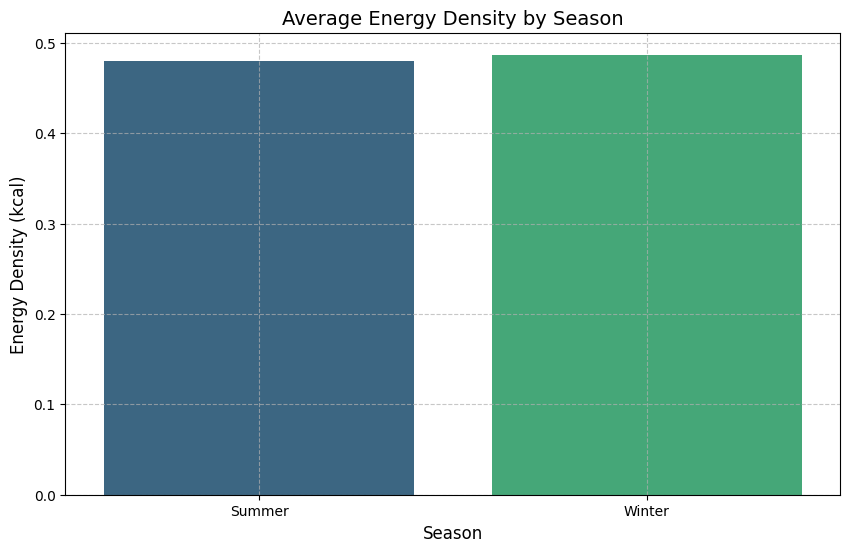

In [63]:
# Set the figure size for the bar plot
plt.figure(figsize=(10, 6))

# Create a bar plot to compare energy density by season
sns.barplot(x='season', y='energy_density', data=energy_by_season, palette='viridis')

# Add title and labels to the plot
plt.title('Average Energy Density by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Energy Density (kcal)', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot as a PNG image
plt.savefig('energy_density_comparison.png')

# Display the plot
plt.show()

### VISUALIZATION 2: Sugar to Fibre Ratio Box Plot

<ipython-input-64-983afe529541>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='sugar_to_fibre_ratio', data=df, palette='Set2')


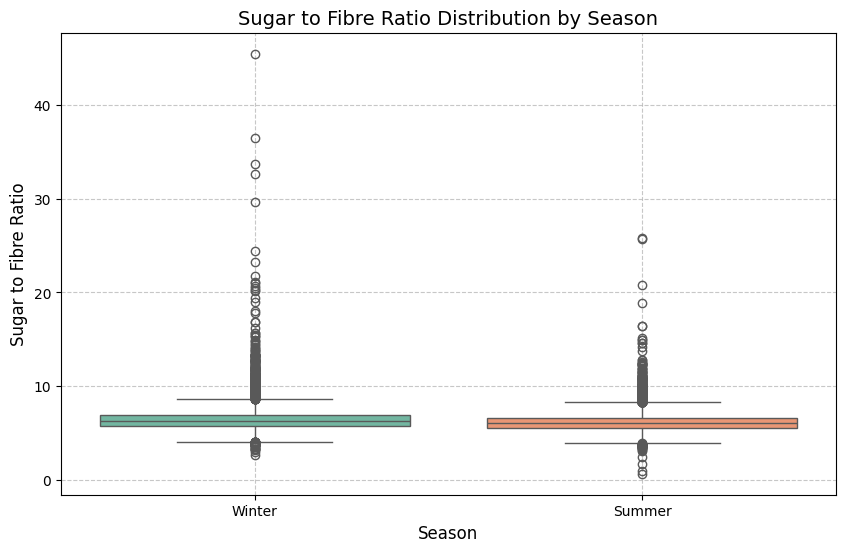

In [64]:
# Set the figure size for the box plot
plt.figure(figsize=(10, 6))

# Create a box plot to show the distribution of sugar to fibre ratio by season
sns.boxplot(x='season', y='sugar_to_fibre_ratio', data=df, palette='Set2')

# Add title and labels to the plot
plt.title('Sugar to Fibre Ratio Distribution by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Sugar to Fibre Ratio', fontsize=12)

# Add grid lines for clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot as a PNG image
plt.savefig('sugar_fibre_ratio_boxplot.png')

# Display the plot
plt.show()

##MACHINE LEARNING ANALYSIS

In [65]:
# Prepare features and target for ML
features = df[['energy_density', 'sugar_to_fibre_ratio']]
target = df['season'].map({'Winter': 1, 'Summer': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)


## Random Forest Classifier

In [66]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

## Accuracy

In [67]:
# Calculate accuracy of the model and print it
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest Classification Accuracy: {accuracy:.2f}%")

# Extract feature importance and organize it in a DataFrame
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("\nFeature Importance:")
print(feature_importance)

Random Forest Classification Accuracy: 55.07%

Feature Importance:
                Feature  Importance
1  sugar_to_fibre_ratio    0.506173
0        energy_density    0.493827


### VISUALIZATION 3: Feature Importance Bar Chart

<ipython-input-68-779f5fbdfbd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


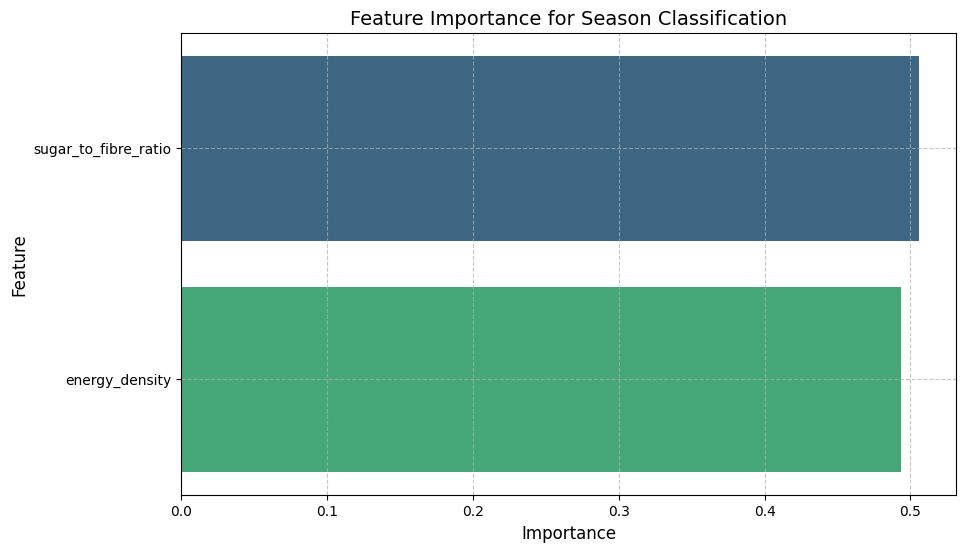

In [68]:
# Set the figure size for the bar plot
plt.figure(figsize=(10, 6))

# Create a bar plot to show feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')

# Add title and labels to the plot
plt.title('Feature Importance for Season Classification', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot as a PNG image
plt.savefig('feature_importance.png')

# Display the plot
plt.show()

###VISUALIZATION 4: Confusion Matrix Heatmap

Confusion matrix tracks classification accuracy

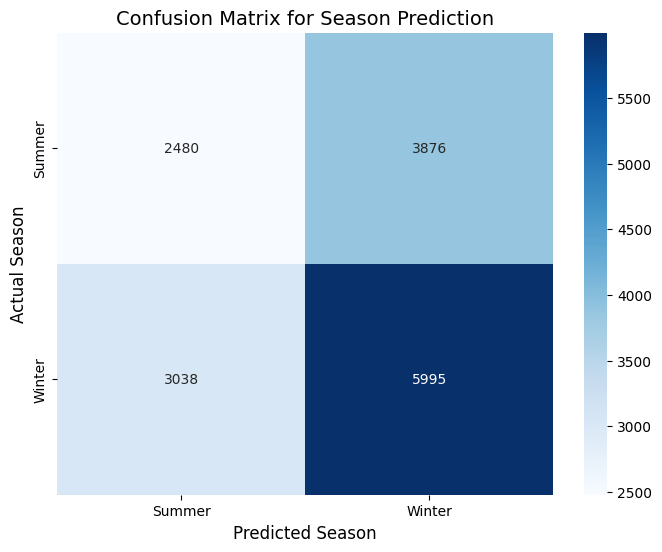

In [69]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Summer', 'Winter'],  # Label for predicted seasons
            yticklabels=['Summer', 'Winter'])  # Label for actual seasons

# Add title and labels to the plot
plt.title('Confusion Matrix for Season Prediction', fontsize=14)
plt.xlabel('Predicted Season', fontsize=12)
plt.ylabel('Actual Season', fontsize=12)

# Save the plot as a PNG image
plt.savefig('confusion_matrix.png')

# Display the plot
plt.show()

##Result

In [70]:
# Print a summary of the results
print("\n--- Summary of Results ---")

# Display average energy density for Winter and Summer
print(f"Average Energy Density in Winter: {df[df['season']=='Winter']['energy_density'].mean():.2f} kcal")
print(f"Average Energy Density in Summer: {df[df['season']=='Summer']['energy_density'].mean():.2f} kcal")

# Display average sugar to fibre ratio for Winter and Summer
print(f"Average Sugar/Fibre Ratio in Winter: {df[df['season']=='Winter']['sugar_to_fibre_ratio'].mean():.2f}")
print(f"Average Sugar/Fibre Ratio in Summer: {df[df['season']=='Summer']['sugar_to_fibre_ratio'].mean():.2f}")

# Print the ML classification accuracy
print(f"ML Classification Accuracy: {accuracy:.2f}%")

# Display the most important feature and its importance
print(f"Most Important Feature: {feature_importance.iloc[0]['Feature']} (Importance: {feature_importance.iloc[0]['Importance']:.4f})")


--- Summary of Results ---
Average Energy Density in Winter: 0.49 kcal
Average Energy Density in Summer: 0.48 kcal
Average Sugar/Fibre Ratio in Winter: 6.43
Average Sugar/Fibre Ratio in Summer: 6.15
ML Classification Accuracy: 55.07%
Most Important Feature: sugar_to_fibre_ratio (Importance: 0.5062)


#Implementing Spark

###Install SPARK

In [71]:
!pip install pyspark


#1. Data description

Importing the CSV files from Jan to dec while concating the datasets of month May - sep as Summer and the rest as Winter

In [72]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType, StringType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [73]:
# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Grocery Analysis") \
    .getOrCreate()

#2. Data Analysis

In [74]:
# Step 1: Read Monthly Datasets
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dfs = {}

# Loop through each month and read the corresponding CSV file
for month in months:
    # Read CSV into Spark DataFrame with header and inferred schema
    df = spark.read.csv(f'/content/{month}_lsoa_grocery.csv', header=True, inferSchema=True)

    # Drop columns where all values are null
    for col_name in df.columns:
        # Escape column names with backticks if necessary
        escaped_col_name = f"`{col_name}`"

        # Check if the column has any non-null values
        if df.filter(F.col(escaped_col_name).isNotNull()).count() == 0:
            df = df.drop(col_name)

    # Store the cleaned DataFrame in the dictionary
    dfs[month] = df


In [75]:
# Define months for winter and summer
winter_months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
summer_months = ['May', 'Jun', 'Jul', 'Aug', 'Sep']

# Initialize empty DataFrames for winter and summer
df_winter = None
df_summer = None

# Combine data for winter months
for month in winter_months:
    if df_winter is None:
        df_winter = dfs[month]
    else:
        df_winter = df_winter.union(dfs[month])

# Combine data for summer months
for month in summer_months:
    if df_summer is None:
        df_summer = dfs[month]
    else:
        df_summer = df_summer.union(dfs[month])

#3. Data Processing Implementation Plan

In [76]:
# Add a new column to identify the season
df_winter = df_winter.withColumn("season", F.lit("Winter"))
df_summer = df_summer.withColumn("season", F.lit("Summer"))

# Combine both winter and summer DataFrames into one
df = df_winter.union(df_summer)

# Ensure numerical columns are properly formatted
numeric_cols = ['energy_density', 'sugar', 'fibre']

for col in numeric_cols:
    df = df.withColumn(col, F.col(col).cast(DoubleType()))

In [77]:
# Calculate medians for imputation
energy_median = df.select(F.percentile_approx("energy_density", 0.5).alias("energy_median")).collect()[0]["energy_median"]
sugar_median = df.select(F.percentile_approx("sugar", 0.5).alias("sugar_median")).collect()[0]["sugar_median"]
fibre_median = df.select(F.percentile_approx("fibre", 0.5).alias("fibre_median")).collect()[0]["fibre_median"]

In [78]:
# Handle missing values by filling with the calculated medians
df = df.fillna({
    'energy_density': energy_median,
    'sugar': sugar_median,
    'fibre': fibre_median
})

In [79]:
# Create a new column for sugar to fibre ratio
df = df.withColumn('sugar_to_fibre_ratio', F.col('sugar') / F.col('fibre'))

# Get the maximum sugar value for handling infinity
sugar_max = df.agg(F.max('sugar').alias('sugar_max')).collect()[0]['sugar_max']

# Replace infinite or NaN values in the sugar to fibre ratio with the maximum sugar value
df = df.withColumn(
    'sugar_to_fibre_ratio',
    F.when(
        (F.col('sugar_to_fibre_ratio') == float('inf')) |
        (F.col('sugar_to_fibre_ratio') == float('-inf')) |
        F.isnan(F.col('sugar_to_fibre_ratio')),
        sugar_max
    ).otherwise(F.col('sugar_to_fibre_ratio'))
)


In [80]:
# Calculate the median of the sugar to fibre ratio for imputation
ratio_median = df.select(F.percentile_approx("sugar_to_fibre_ratio", 0.5).alias("ratio_median")).collect()[0]["ratio_median"]
df = df.fillna({'sugar_to_fibre_ratio': ratio_median})

# Calculate the average energy density by season (for visualization 1)
energy_by_season = df.groupBy('season').agg(F.avg('energy_density').alias('energy_density')).toPandas()

# Convert the DataFrame to pandas for visualization
df_pd = df.toPandas()

#4. Data Visualization

### VISUALIZATION 1: Energy Density Bar Plot

<ipython-input-81-053db2b94750>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='energy_density', data=energy_by_season, palette='viridis')


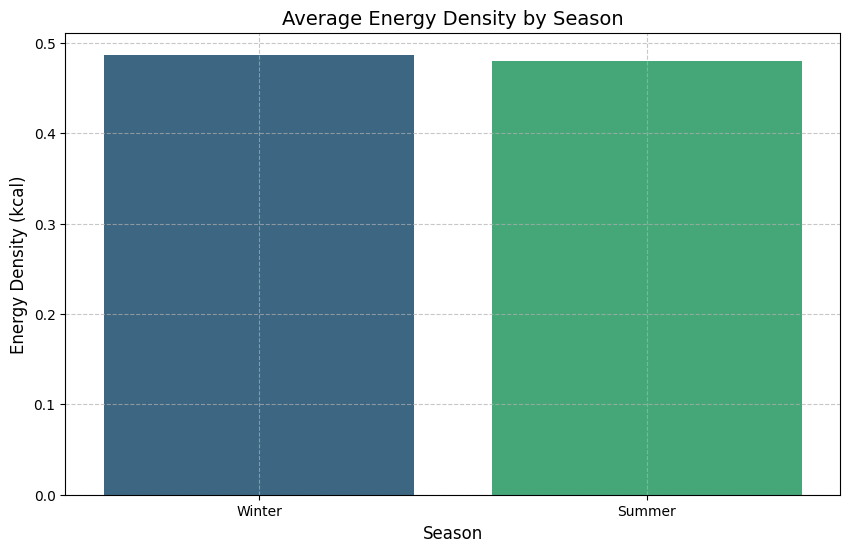

In [81]:
# Set the figure size for the bar plot
plt.figure(figsize=(10, 6))

# Create a bar plot to compare average energy density by season
sns.barplot(x='season', y='energy_density', data=energy_by_season, palette='viridis')

# Add title and labels to the plot
plt.title('Average Energy Density by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Energy Density (kcal)', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot as a PNG image
plt.savefig('energy_density_comparison.png')

# Display the plot
plt.show()

### VISUALIZATION 2: Sugar to Fibre Ratio Box Plot

<ipython-input-82-ad1990337a76>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='sugar_to_fibre_ratio', data=df_pd, palette='Set2')


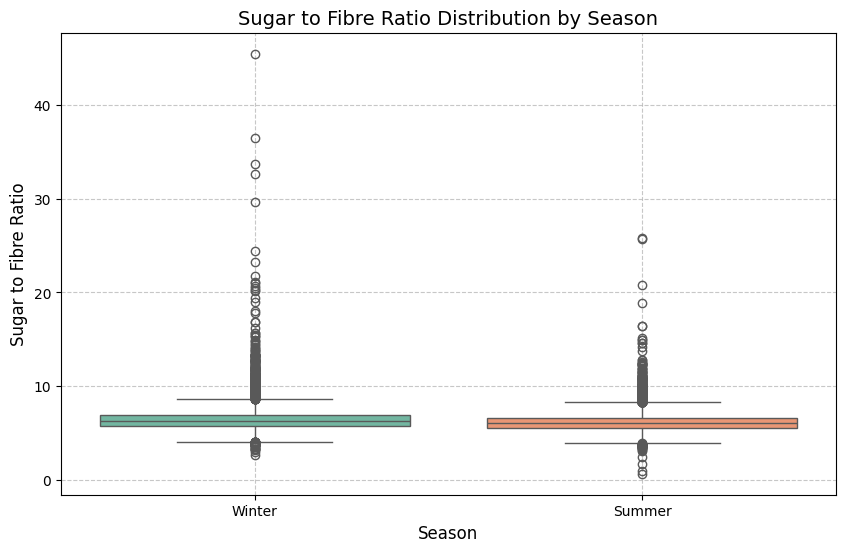

In [82]:
# Set the figure size for the box plot
plt.figure(figsize=(10, 6))

# Create a box plot to show the distribution of sugar to fibre ratio by season
sns.boxplot(x='season', y='sugar_to_fibre_ratio', data=df_pd, palette='Set2')

# Add title and labels to the plot
plt.title('Sugar to Fibre Ratio Distribution by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Sugar to Fibre Ratio', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot as a PNG image
plt.savefig('sugar_fibre_ratio_boxplot.png')

# Display the plot
plt.show()

##MACHINE LEARNING ANALYSIS

In [83]:
# Add a new column 'season_label' where Winter is labeled as 1 and other seasons as 0
df = df.withColumn('season_label', F.when(F.col('season') == 'Winter', 1.0).otherwise(0.0))

# Prepare features for machine learning using VectorAssembler
feature_cols = ['energy_density', 'sugar_to_fibre_ratio']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df_assembled = assembler.transform(df)

# Split the data into training (70%) and testing (30%) sets
train_df, test_df = df_assembled.randomSplit([0.7, 0.3], seed=42)

## Random Forest Classifier

In [84]:
# Train a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(labelCol='season_label', featuresCol='features', numTrees=100, seed=42)
rf_model = rf.fit(train_df)

# Make predictions on the test set
predictions = rf_model.transform(test_df)

## Accuracy

In [85]:
# Calculate accuracy of the Random Forest model
evaluator = MulticlassClassificationEvaluator(
    labelCol='season_label',
    predictionCol='prediction',
    metricName='accuracy'
)
accuracy = evaluator.evaluate(predictions) * 100
print(f"Random Forest Classification Accuracy: {accuracy:.2f}%")

# Get feature importance from the Random Forest model
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.featureImportances.toArray()
})

# Sort features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(feature_importance)


Random Forest Classification Accuracy: 58.84%

Feature Importance:
                Feature  Importance
1  sugar_to_fibre_ratio    0.698146
0        energy_density    0.301854


### VISUALIZATION 3: Feature Importance Bar Chart

<ipython-input-86-c85b2f2e3ee7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


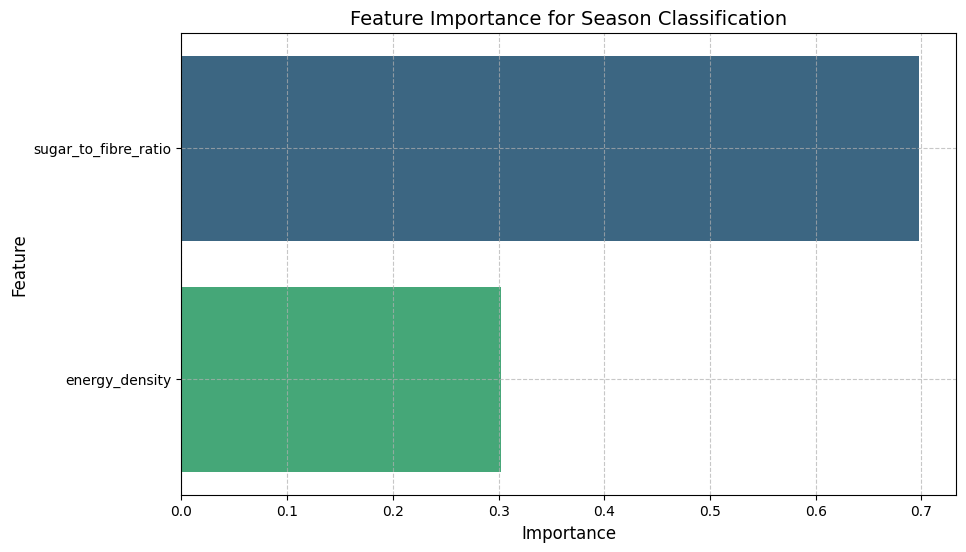

In [86]:
# Set the figure size for the bar plot
plt.figure(figsize=(10, 6))

# Create a bar plot for feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')

# Add title and labels to the plot
plt.title('Feature Importance for Season Classification', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot as a PNG image
plt.savefig('feature_importance.png')

# Display the plot
plt.show()

###VISUALIZATION 4: Confusion Matrix Heatmap

Confusion matrix tracks classification accuracy

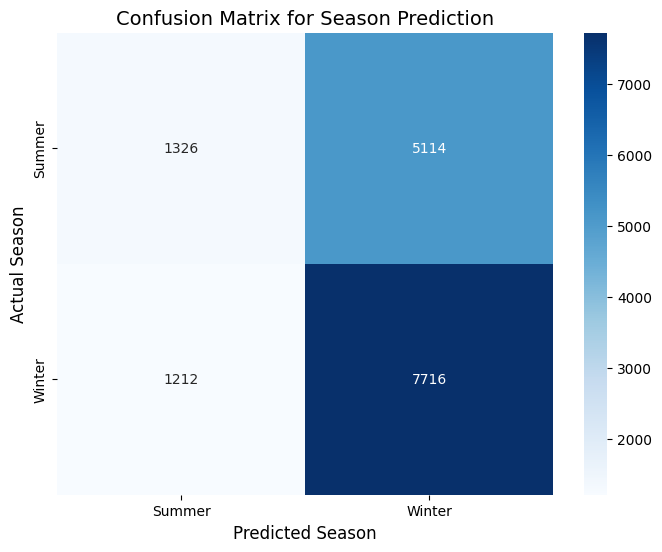

In [87]:
# Convert predictions to pandas DataFrame for confusion matrix
pred_pd = predictions.select('season_label', 'prediction').toPandas()

# Generate confusion matrix
cm = pd.crosstab(
    pred_pd['season_label'],
    pred_pd['prediction'],
    rownames=['Actual'],
    colnames=['Predicted']
)

# Set the figure size for the heatmap
plt.figure(figsize=(8, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Summer', 'Winter'],
            yticklabels=['Summer', 'Winter'])

# Add title and labels to the plot
plt.title('Confusion Matrix for Season Prediction', fontsize=14)
plt.xlabel('Predicted Season', fontsize=12)
plt.ylabel('Actual Season', fontsize=12)

# Save the plot as a PNG image
plt.savefig('confusion_matrix.png')

# Display the plot
plt.show()

In [88]:
# Calculate average energy density for Winter and Summer
winter_energy = df.filter(F.col('season') == 'Winter').agg(F.avg('energy_density').alias('avg')).collect()[0]['avg']
summer_energy = df.filter(F.col('season') == 'Summer').agg(F.avg('energy_density').alias('avg')).collect()[0]['avg']

# Calculate average sugar to fibre ratio for Winter and Summer
winter_ratio = df.filter(F.col('season') == 'Winter').agg(F.avg('sugar_to_fibre_ratio').alias('avg')).collect()[0]['avg']
summer_ratio = df.filter(F.col('season') == 'Summer').agg(F.avg('sugar_to_fibre_ratio').alias('avg')).collect()[0]['avg']

In [89]:
# Print summary
print("\n--- Summary of Results ---")
print(f"Average Energy Density in Winter: {winter_energy:.2f} kcal")
print(f"Average Energy Density in Summer: {summer_energy:.2f} kcal")
print(f"Average Sugar/Fibre Ratio in Winter: {winter_ratio:.2f}")
print(f"Average Sugar/Fibre Ratio in Summer: {summer_ratio:.2f}")
print(f"ML Classification Accuracy: {accuracy:.2f}%")
print(f"Most Important Feature: {feature_importance.iloc[0]['Feature']} (Importance: {feature_importance.iloc[0]['Importance']:.4f})")




--- Summary of Results ---
Average Energy Density in Winter: 0.49 kcal
Average Energy Density in Summer: 0.48 kcal
Average Sugar/Fibre Ratio in Winter: 6.43
Average Sugar/Fibre Ratio in Summer: 6.15
ML Classification Accuracy: 58.84%
Most Important Feature: sugar_to_fibre_ratio (Importance: 0.6981)


## Stopping Spark session

In [90]:
spark.stop()